In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
csv_file_path = '/content/drive/MyDrive/DATA/Telco-Customer-Churn.csv'

df = pd.read_csv(csv_file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


## General Feature Exploration

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

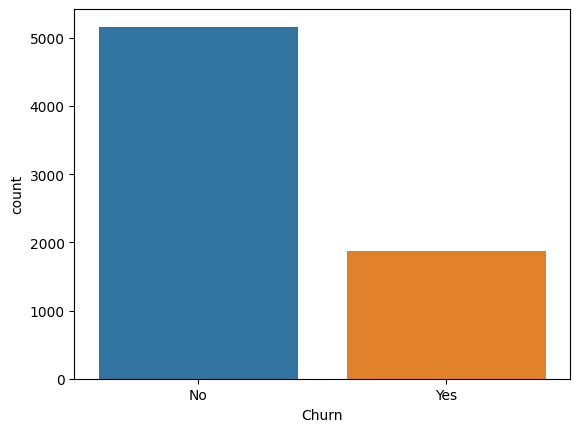

In [9]:
sns.countplot(data=df, x='Churn')

In [10]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='TotalCharges'>

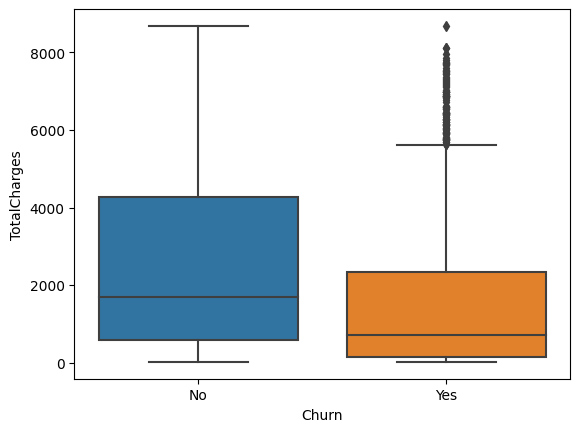

In [12]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

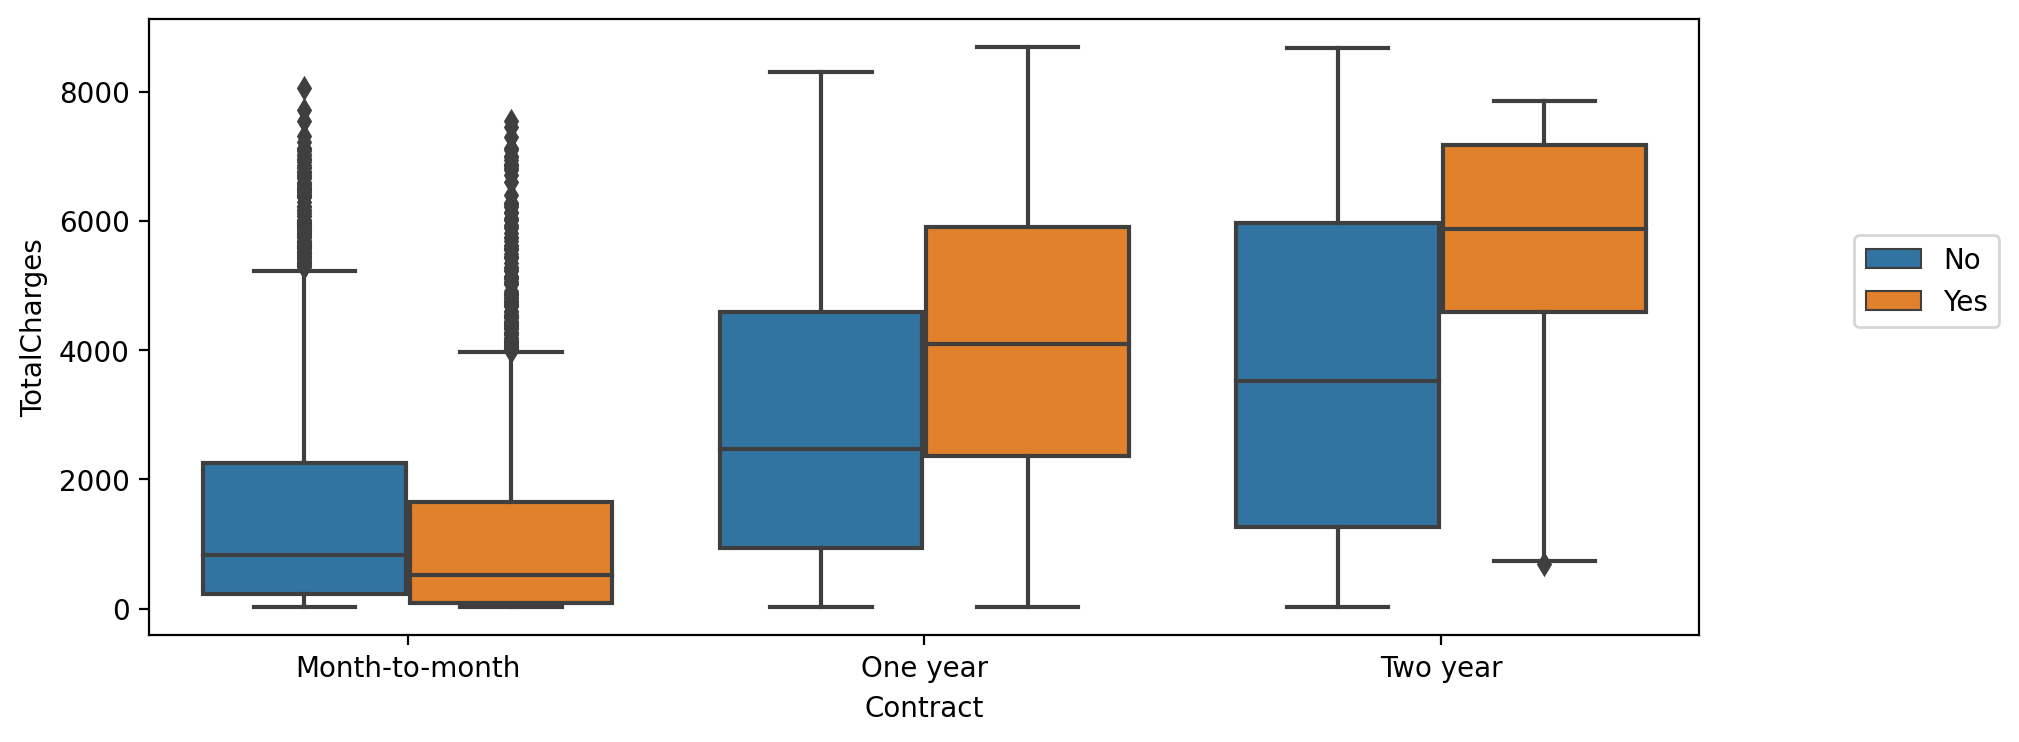

In [14]:
plt.figure(figsize=(10,4), dpi= 200)
sns.boxplot(data=df, x='Contract' , y='TotalCharges',hue='Churn')
plt.legend(loc=(1.1,0.5))

In [19]:
corr_df = pd.get_dummies(df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','InternetService','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]).corr()

In [23]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

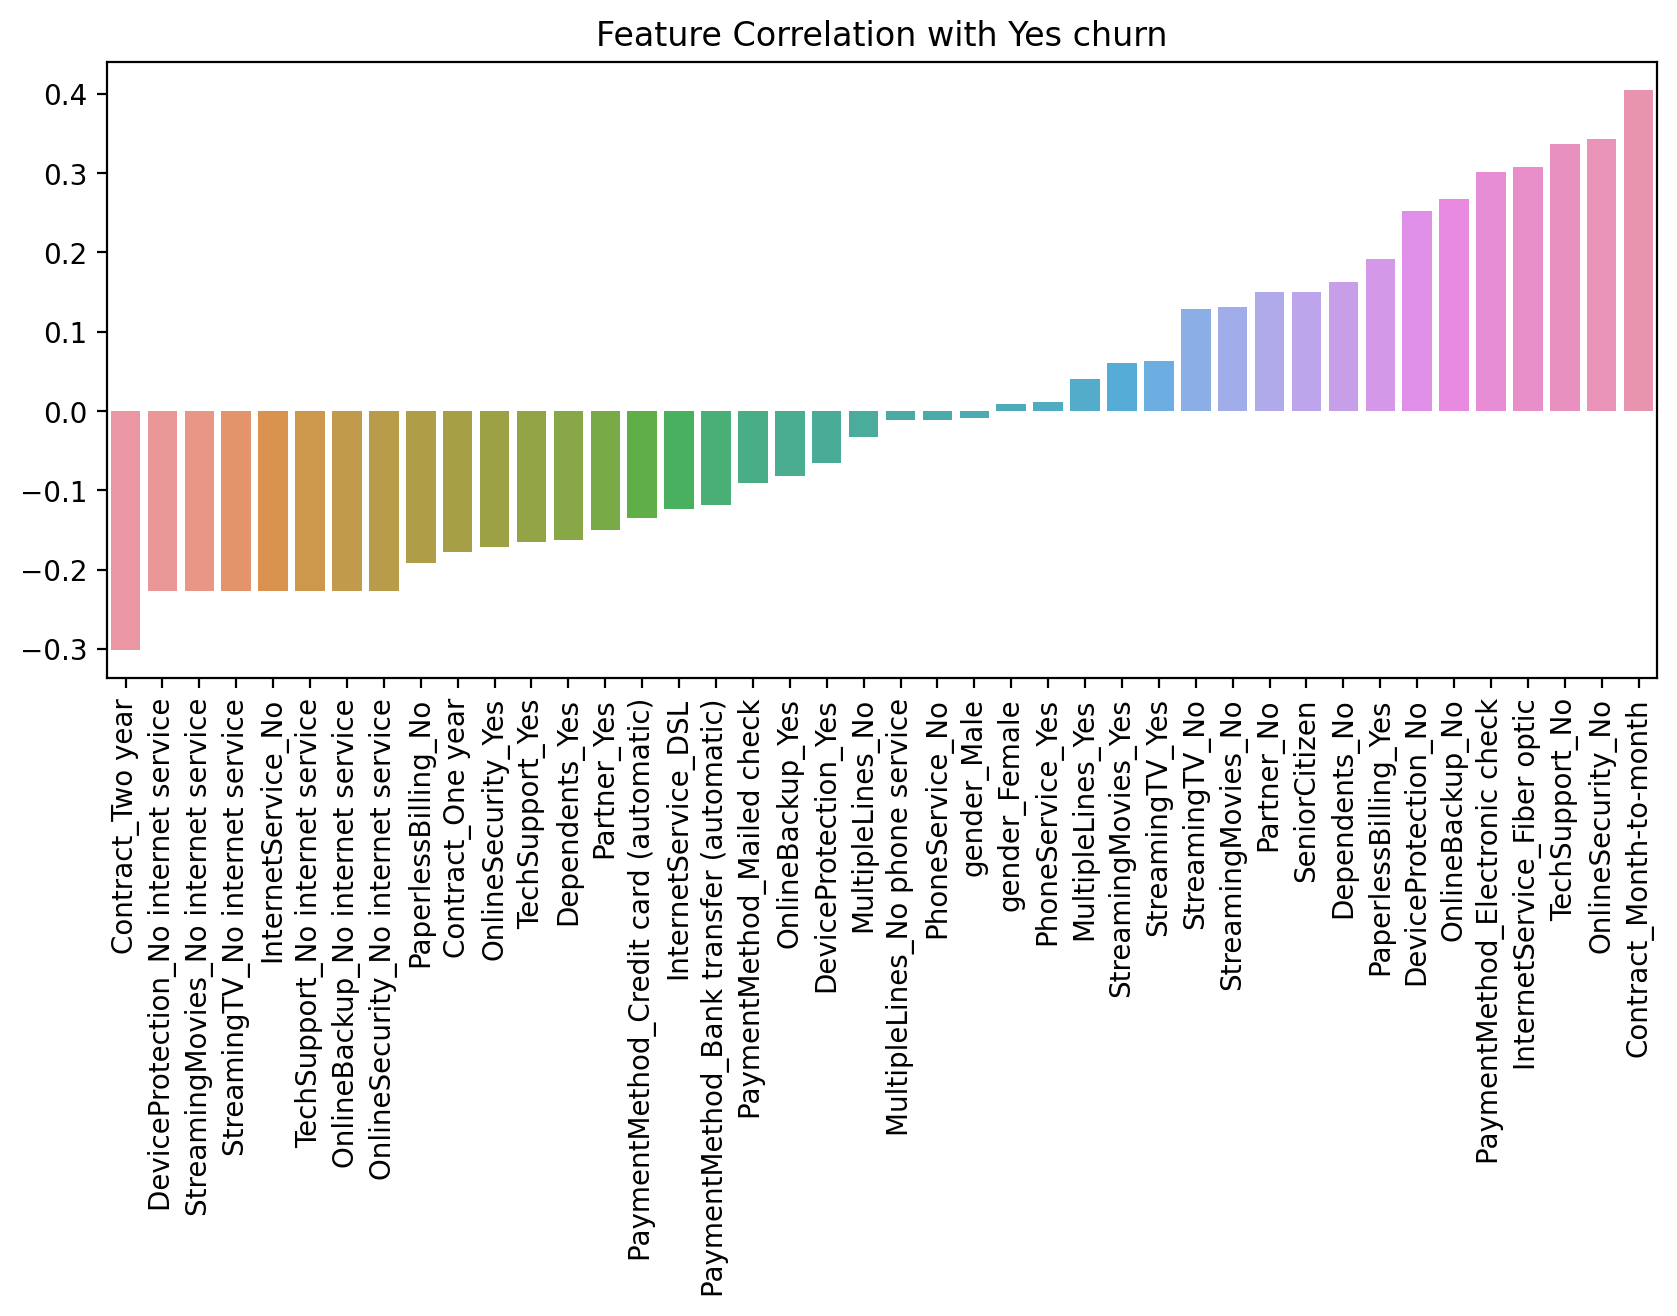

In [29]:
plt.figure(figsize=(10,4), dpi=200)
plt.title("Feature Correlation with Yes churn")
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.xticks(rotation=90);

<Axes: xlabel='tenure', ylabel='Count'>

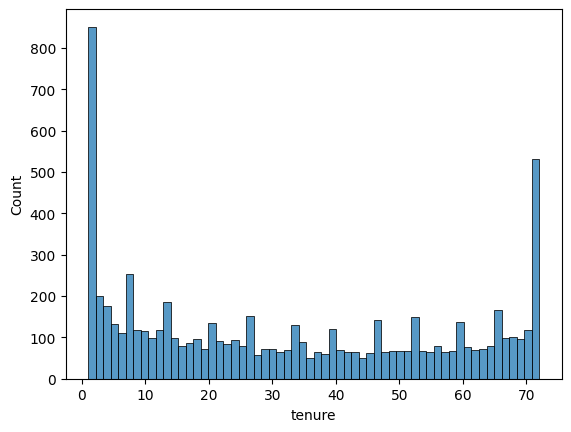

In [31]:
sns.histplot(data=df, x='tenure', bins=60)

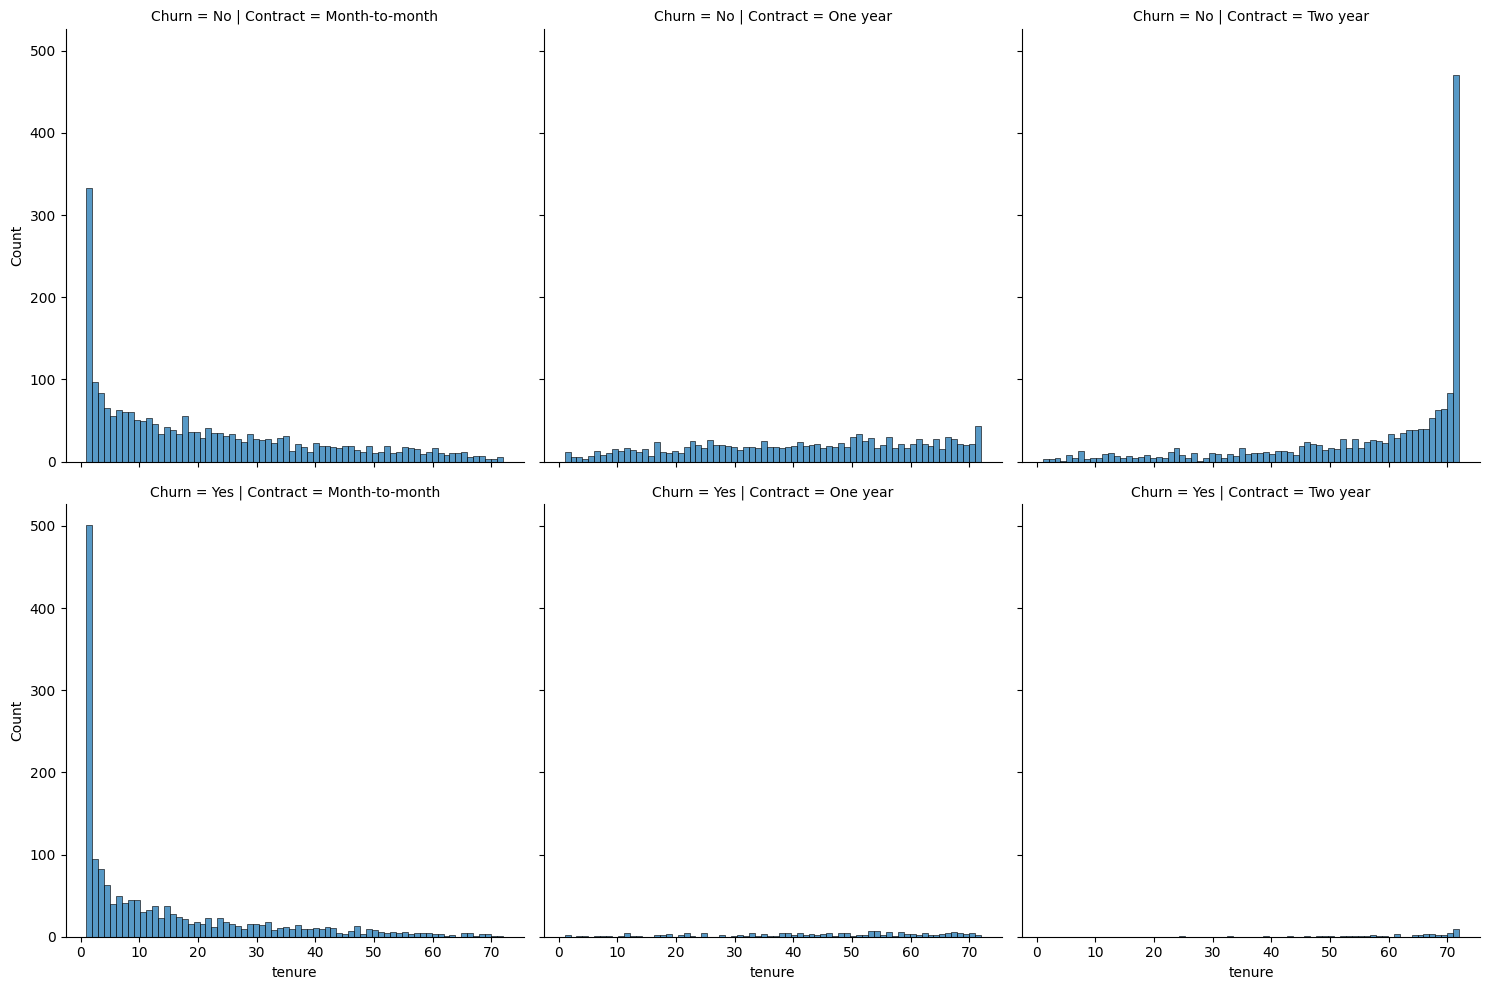

In [33]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

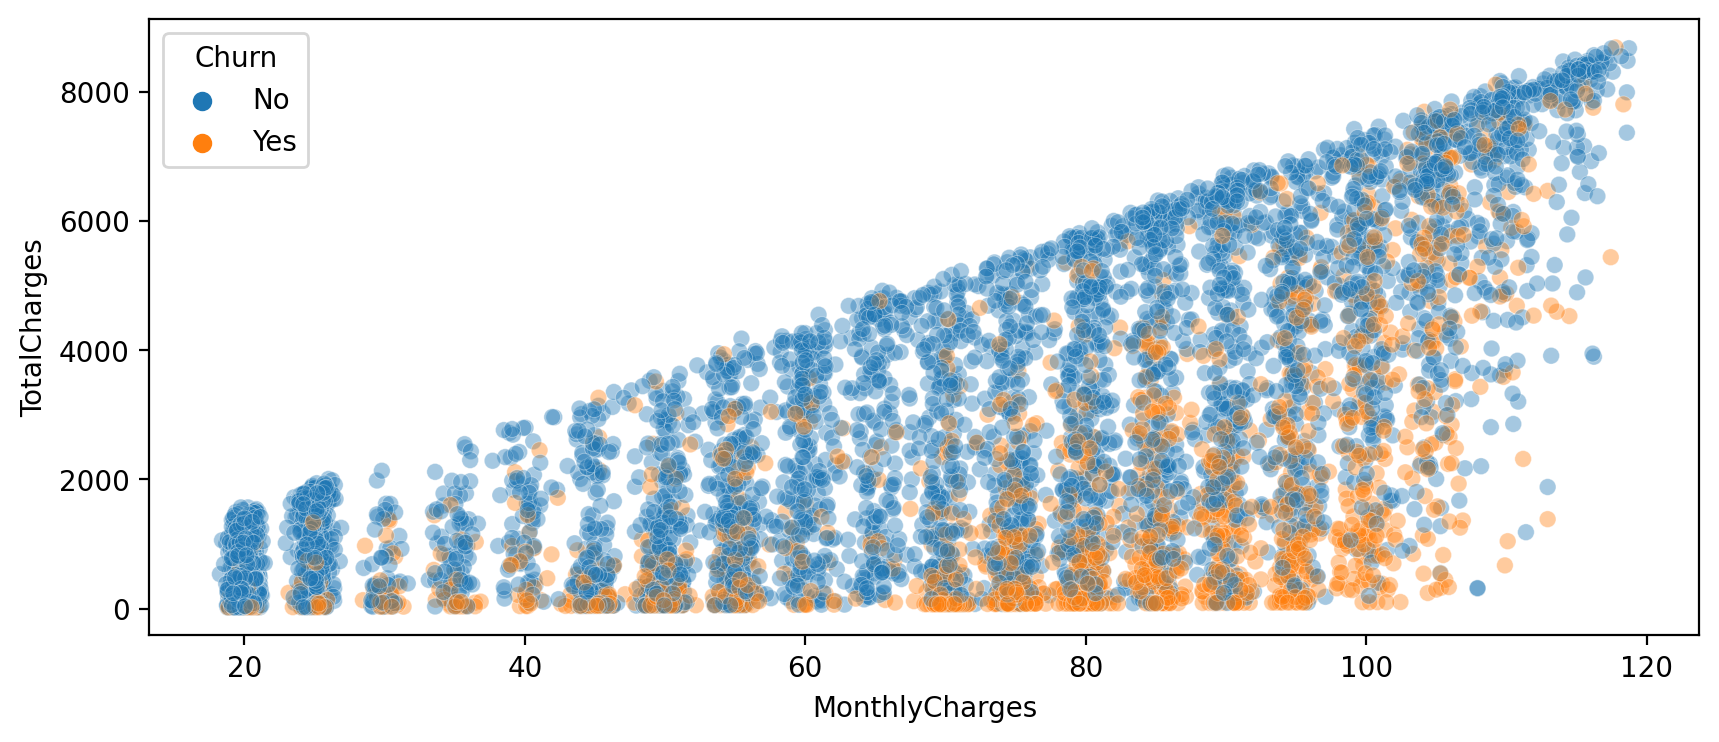

In [37]:
plt.figure(figsize=(10,4), dpi= 200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges',hue='Churn',alpha=0.4, linewidth=0.3)

In [40]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [41]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [42]:
churn_rate = 100*yes_churn / (no_churn + yes_churn)

<Axes: xlabel='tenure'>

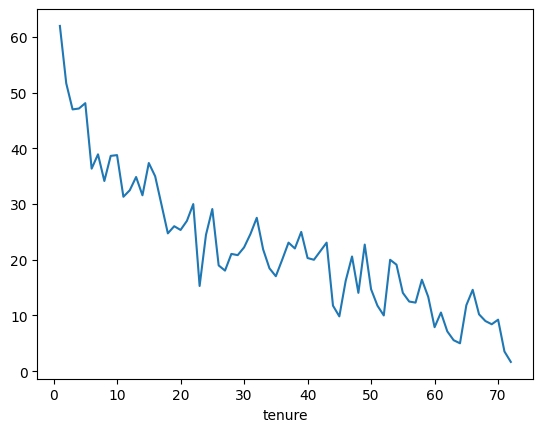

In [45]:
churn_rate.transpose()['customerID'].plot()

In [46]:
def cohort(tenure):
      if tenure < 13:
          return '0-12 Months'
      elif tenure < 25:
          return '12-24 Months'
      elif tenure < 49:
          return '24-48 Months'
      else:
        return 'over 48 Months'


In [48]:
df['tenure_cohort'] = df['tenure'].apply(cohort)

In [50]:
df['tenure_cohort']

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    over 48 Months
Name: tenure_cohort, Length: 7032, dtype: object

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

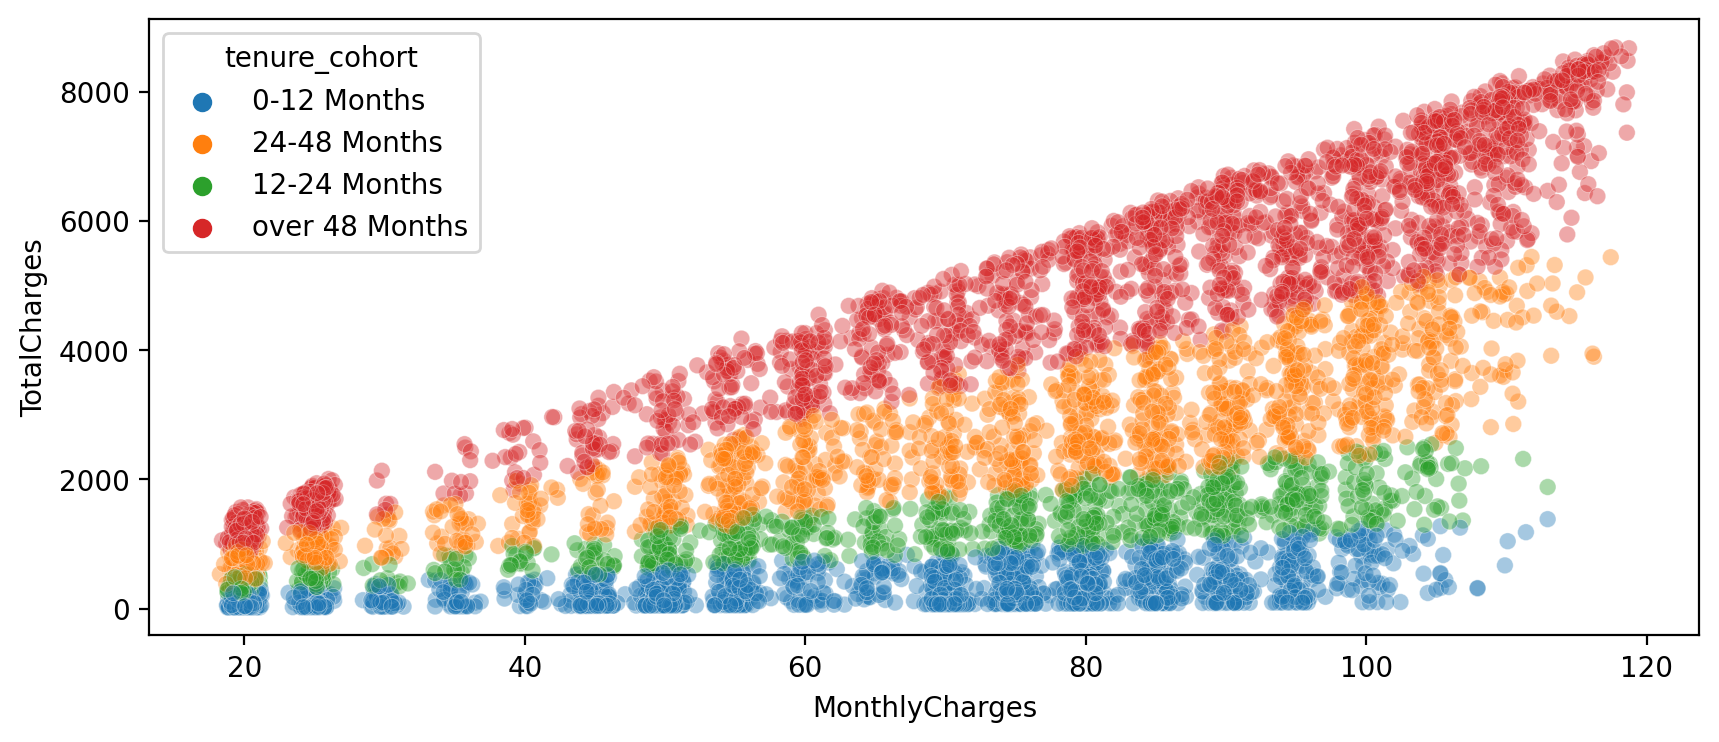

In [51]:
plt.figure(figsize=(10,4), dpi= 200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges',hue='tenure_cohort',alpha=0.4, linewidth=0.3)

<Axes: xlabel='tenure_cohort', ylabel='count'>

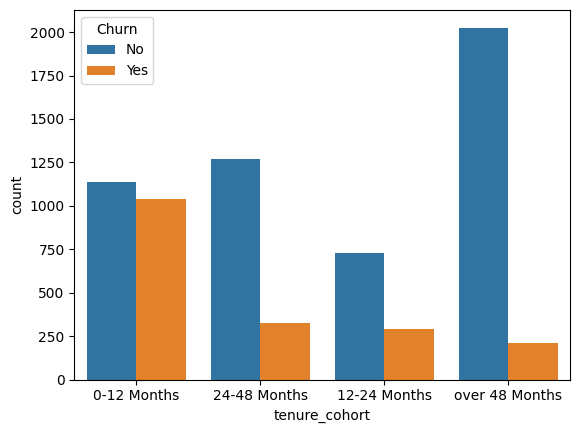

In [52]:
sns.countplot(data=df, x='tenure_cohort', hue='Churn')

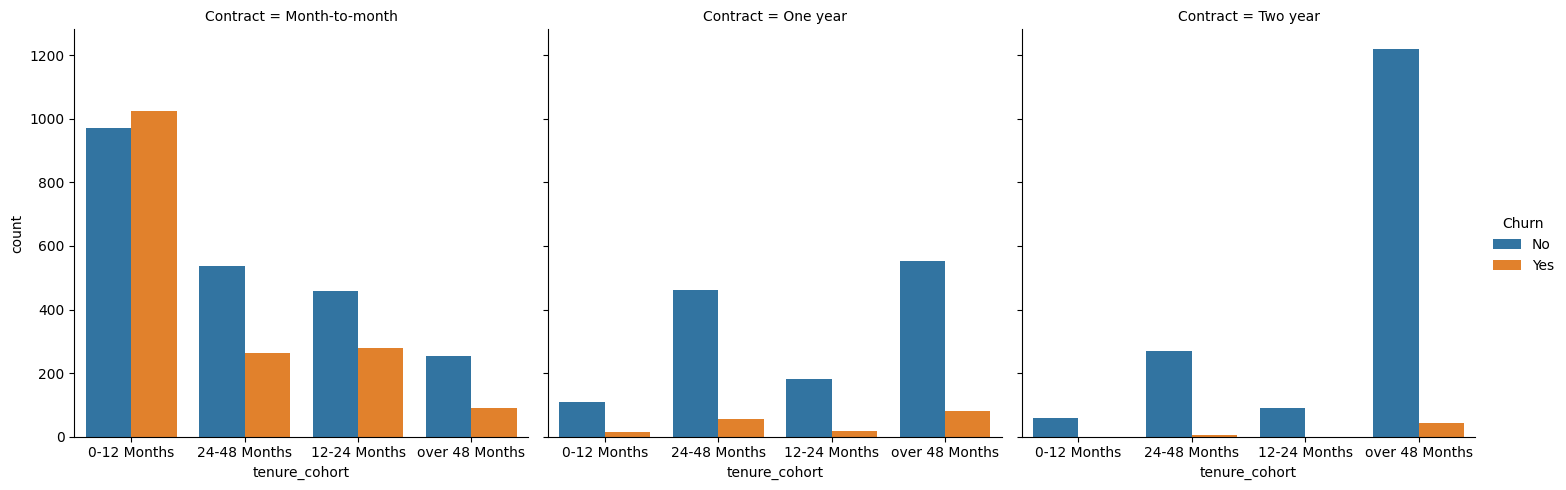

In [53]:
#  create a grid of count plots showing counts per tenure cohort, separated out by contract type

sns.catplot(data=df, x='tenure_cohort', hue='Churn',kind='count', col='Contract')

In [54]:
 df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24 Months
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,over 48 Months
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 Months
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 Months


# Predictive modeling

In [56]:
X  = df.drop(['Churn','customerID'], axis=1)

In [57]:
X = pd.get_dummies(X, drop_first = True)

In [58]:
y = df['Churn']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier(max_depth = 6)

In [63]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [65]:
from sklearn.metrics import  classification_report

In [66]:
pred  = dt.predict(X_test)

In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



In [72]:
imp_feat = pd.DataFrame(data=dt.feature_importances_, index = X.columns, columns = ['Feat Imp'])

In [73]:
imp_feat = imp_feat.sort_values('Feat Imp')

In [75]:
imp_feat = imp_feat[imp_feat['Feat Imp'] > 0]

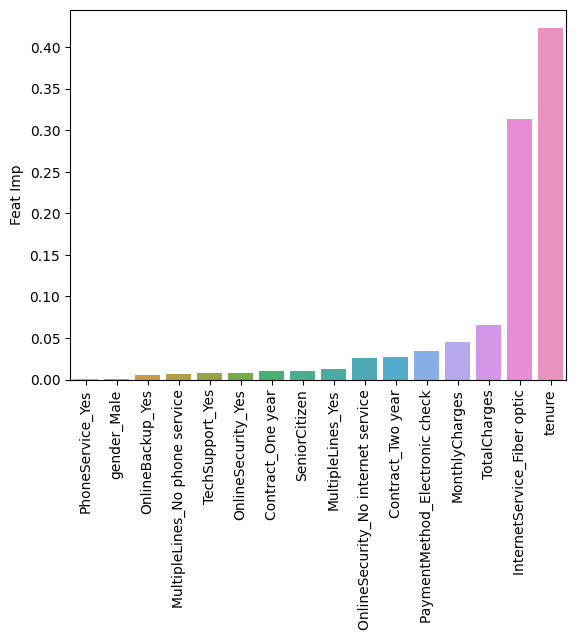

In [78]:
sns.barplot(data = imp_feat , x=imp_feat.index, y='Feat Imp')
plt.xticks(rotation = 90);

In [79]:
from sklearn.tree import plot_tree


[Text(0.48522727272727273, 0.9285714285714286, 'x[1] <= 17.5\ngini = 0.396\nsamples = 6328\nvalue = [4606, 1722]'),
 Text(0.2375, 0.7857142857142857, 'x[10] <= 0.5\ngini = 0.497\nsamples = 2387\nvalue = [1287, 1100]'),
 Text(0.1340909090909091, 0.6428571428571429, 'x[1] <= 5.5\ngini = 0.412\nsamples = 1343\nvalue = [954, 389]'),
 Text(0.07272727272727272, 0.5, 'x[12] <= 0.5\ngini = 0.482\nsamples = 696\nvalue = [414, 282]'),
 Text(0.03636363636363636, 0.35714285714285715, 'x[0] <= 0.5\ngini = 0.5\nsamples = 421\nvalue = [207, 214]'),
 Text(0.01818181818181818, 0.21428571428571427, 'x[2] <= 55.225\ngini = 0.499\nsamples = 370\nvalue = [194, 176]'),
 Text(0.00909090909090909, 0.07142857142857142, 'gini = 0.5\nsamples = 298\nvalue = [145, 153]'),
 Text(0.02727272727272727, 0.07142857142857142, 'gini = 0.435\nsamples = 72\nvalue = [49, 23]'),
 Text(0.05454545454545454, 0.21428571428571427, 'x[2] <= 29.175\ngini = 0.38\nsamples = 51\nvalue = [13, 38]'),
 Text(0.045454545454545456, 0.0714285

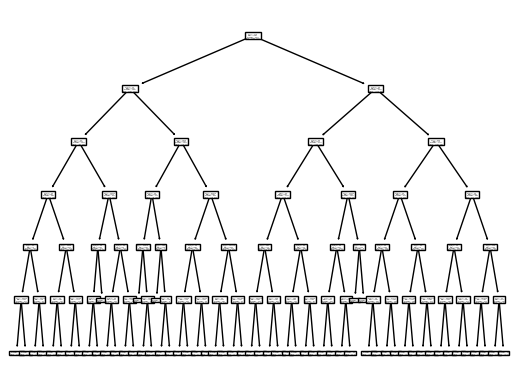

In [80]:
plot_tree(dt)

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier()

In [83]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
preds = rf.predict(X_test)

In [87]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.53      0.47      0.50       147

    accuracy                           0.80       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.80      0.80      0.80       704



## AdaBoost Classifier



In [88]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier


In [91]:
ada = AdaBoostClassifier()

In [92]:
gb_model = GradientBoostingClassifier()

In [94]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [95]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [96]:
ada_preds = ada.predict(X_test)

In [98]:
gb_preds = gb_model.predict(X_test)

In [99]:
print(classification_report(y_test,ada_preds))

NameError: ignored

In [ ]:
print(classification_report(y_test,ada_preds))